<a href="https://colab.research.google.com/github/BhavikBuchke/Cisco-Data-science-program/blob/main/Data%20modeling/Animal%20Sleep%20Project/animal%20sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal Sleep

Some animals, such as elephants, sleep only 3-4 hours a night, while others, like bats, can sleep up to 20 hours.

Is there a relationship between sleep duration and body mass? Is a species' diet correlated with sleep time?

The file `animal-sleep.csv` provides data on the average sleep duration of 77 animal species, along with their average body mass in kilograms.

In [2]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'animal-sleep.csv' and 'linear_model.py'.

from google.colab import files
uploaded = files.upload()

Saving animal-sleep.csv to animal-sleep (1).csv
Saving linear_model.py to linear_model (1).py


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('animal-sleep.csv')
df.head()

,animal,diet,sleep,mass
0,african elephant,herbivore,3.3,6654.000
1,african giant pouched rat,omnivore,8.3,1.000
2,african striped mouse,herbivore,8.7,0.044
3,arctic fox,carnivore,12.5,3.380
4,arctic ground squirrel,omnivore,16.6,0.920


Text(0, 0.5, 'hours of sleep per day')

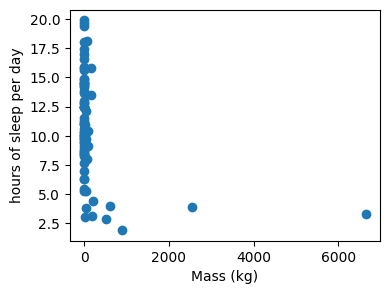

In [2]:
plt.figure(figsize=(4, 3))
plt.scatter(df['mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')

We see that the mass data exhibits a strong right skew with a long tail. A log transformation can convert an exponential relationship into a linear one, making it easier to model with linear regression.

In [3]:
import math
df['log10_mass'] = df['mass'].apply(math.log10)  # apply the function to each element
df.head()

,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
2,african striped mouse,herbivore,8.7,0.044,-1.356547
3,arctic fox,carnivore,12.5,3.380,0.528917
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212


Below is code for plotting the data using the log scale.

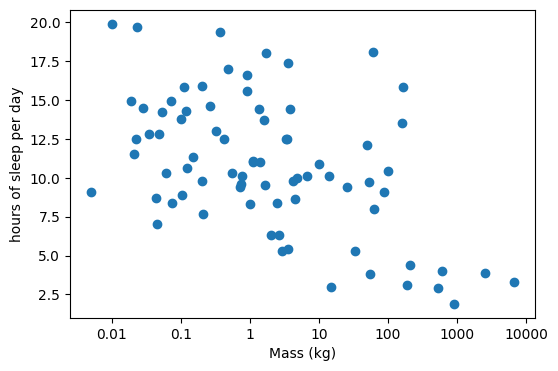

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.show()

### Project Ideas

- Model the relationship between `log10_mass` and hours of `sleep`.

- Create three separate linear models for each `diet` category: carnivores, omnivores, and herbivores.

- Visualize the data and their best-fit lines on a single plot with distinct colors and symbols for each `diet` category, or use separate plots if more suitable.

- Explore and propose mechanisms that could explain the results, potentially involving additional research.

In [7]:
# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self)

In [5]:
# Carnivore dite DataFrame.
carnivore = df[df['diet'] == 'carnivore'].copy()
print(f'Carnivore data:\n{carnivore.head()}')

Carnivore data:
             animal       diet  sleep    mass  log10_mass
3        arctic fox  carnivore   12.5   3.380    0.528917
7     big brown bat  carnivore   19.7   0.023   -1.638272
8           cheetah  carnivore   12.1  50.000    1.698970
15  desert hedgehog  carnivore   10.3   0.550   -0.259637
16              dog  carnivore   10.1  14.000    1.146128


In [18]:
# Modelling the relationship between log10_mass and hours of sleep for Carnivores.
carnivore_model = LinearModel('carnivore_sleep_model')
carnivore_x= carnivore['log10_mass']
carnivore_y= carnivore['sleep']
carnivore_model.fit(carnivore_x, carnivore_y)
carnivore_model.print_model_info()

LinearModel(carnivore_sleep_model):
Slope: -0.14090226025203156
Intercept: 12.99704850696372
R-squared: 0.003186503413273978


In [7]:
# Omnivore dite DataFrame.
omnivore = df[df['diet'] == 'omnivore'].copy()
print(f'Omnivore data:\n{omnivore.head()}')

Omnivore data:
                       animal      diet  sleep    mass  log10_mass
1   african giant pouched rat  omnivore    8.3   1.000    0.000000
4      arctic ground squirrel  omnivore   16.6   0.920   -0.036212
6                      baboon  omnivore    9.4  25.235    1.402003
9                  chimpanzee  omnivore    9.7  52.200    1.717671
11                 cotton rat  omnivore   11.3   0.148   -0.829738


In [20]:
# Modelling the relationship between log10_mass and hours of sleep for Omnivores.
omnivore_model = LinearModel('omnivore_sleep_model')
omnivore_x= omnivore['log10_mass']
omnivore_y= omnivore['sleep']
omnivore_model.fit(omnivore_x, omnivore_y)
omnivore_model.print_model_info()

LinearModel(omnivore_sleep_model):
Slope: -1.0841960083999436
Intercept: 11.662140158348944
R-squared: 0.10944681716489979


In [9]:
# Herbivore dite DataFrame.
herbivore = df[df['diet'] == 'herbivore'].copy()
print(f'Herbivore data:\n{herbivore.head()}')

Herbivore data:
                   animal       diet  sleep      mass  log10_mass
0        african elephant  herbivore    3.3  6654.000    3.823083
2   african striped mouse  herbivore    8.7     0.044   -1.356547
5          asian elephant  herbivore    3.9  2547.000    3.406029
10             chinchilla  herbivore   12.5     0.420   -0.376751
12                    cow  herbivore    4.0   600.000    2.778151


In [24]:
# Modelling the relationship between log10_mass and hours of sleep for Herbivores.
herbivore_model = LinearModel('herbivore_sleep_model')
herbivore_x= herbivore['log10_mass']
herbivore_y= herbivore['sleep']
herbivore_model.fit(herbivore_x, herbivore_y)
herbivore_model.print_model_info()

LinearModel(herbivore_sleep_model):
Slope: -2.2408355966298785
Intercept: 9.596484459635365
R-squared: 0.6255104280867234


In [57]:
def improved_visuals():
  ax = plt.gca()
  ax.spines[['top','bottom','right','left']].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.grid(axis='both', alpha=0.5)

Text(0, 0.5, 'Sleep per day (Hour)')

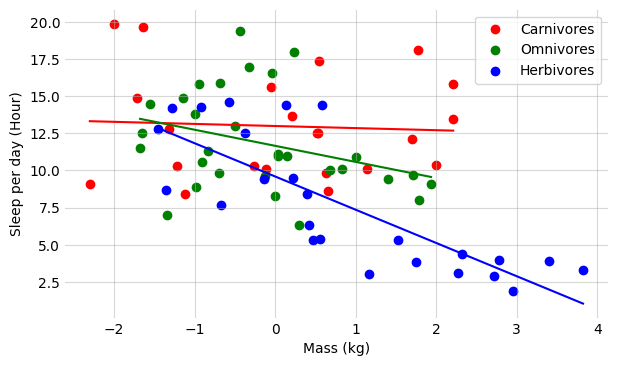

In [59]:
# Visualizing the data and their best-fit lines.
plt.figure(figsize=(7, 4))

plt.scatter(data=carnivore, x='log10_mass', y='sleep', color='red', label='Carnivores')
plt.scatter(data=omnivore, x='log10_mass', y='sleep', color='green', label='Omnivores')
plt.scatter(data=herbivore, x='log10_mass', y='sleep', color='blue', label='Herbivores')

carnivore_model.plot_model(x_min= carnivore_x.min(), x_max= carnivore_x.max(), color='red')
omnivore_model.plot_model(x_min= omnivore_x.min(), x_max= omnivore_x.max(), color='green')
herbivore_model.plot_model(x_min= herbivore_x.min(), x_max= herbivore_x.max(), color='blue')

improved_visuals()
plt.legend()
plt.xlabel('Mass (kg)')
plt.ylabel('Sleep per day (Hour)')

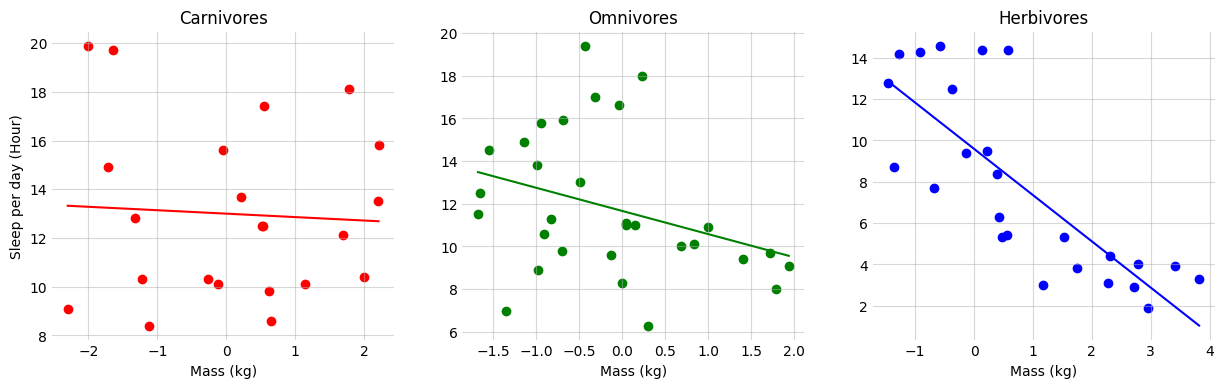

In [54]:
# All three ploted separately
plt.figure(figsize=(15, 4))

# Carnivore plot
plt.subplot(1, 3, 1)
plt.scatter(x= carnivore_x , y= carnivore_y, color= 'red')
carnivore_model.plot_model(carnivore_x.min(), carnivore_x.max(), color= 'red')
plt.xlabel('Mass (kg)')
plt.ylabel('Sleep per day (Hour)')
plt.title('Carnivores')
improved_visuals()

# Omnivore plot
plt.subplot(1, 3, 2)
plt.scatter(x= omnivore_x, y= omnivore_y, color= 'green')
omnivore_model.plot_model(omnivore_x.min(), omnivore_x.max(), color= 'green')
plt.xlabel('Mass (kg)')
plt.title('Omnivores')
improved_visuals()

# Herbivore plot
plt.subplot(1, 3, 3)
plt.scatter(x= herbivore_x, y= herbivore_y, color= 'blue')
herbivore_model.plot_model(x_min= herbivore_x.min(), x_max= herbivore_x.max(), color='blue')
plt.xlabel('Mass (kg)')
plt.title('Herbivores')
improved_visuals()

The following summary highlights how diet type fundamentally changes the relationship between an animal's size and its sleep needs.

##**Data Analysis: Linear Model Results**

The table below compares how body mass (log10_mass) predicts sleep duration across the three diet groups:

Diet Category | Slope(Rate of Change) | Intercept (1kg Animal) | R2(Predictive Power)
:---:|:---:|:---:|:---:|
Herbivores (Blue) | -2.241 (Steep) | 9.6 hours | 0.626 (Strong)
Omnivores (Green) | -1.084 (Moderate) | 11.7 hours | 0.109 (Weak)
Carnivores (Red) | -0.141 (Flat) | 13.0 hours | 0.003 (None)



###**Key Drivers of These Patterns**

####**1. Herbivores: The Size-Sleep Tradeoff**

**Finding:** Mass is a strong predictor of sleep; the larger the herbivore, the less it sleeps.

**Mechanism:** Large herbivores (like elephants) must spend the vast majority of their day foraging and digesting low-energy plant matter to sustain their mass, leaving very little time for sleep.

####**2. Carnivores: The "Apex" Advantage**

**Finding:** Mass has almost no impact on sleep duration.

**Mechanism:** Meat is nutrient-dense, and many carnivores are apex predators. Once they have successfully hunted, they can afford to sleep for long periods regardless of their size, as they face fewer threats and have met their caloric needs quickly.

####**3. Omnivores: The Flexible Middle**

**Finding:** A moderate relationship that falls between the other two groups.

**Mechanism:** Their ability to switch food sources (plants vs. meat) and their varied positions in the food chain result in less predictable sleep patterns compared to specialized herbivores.

##**Conclusion**

Diet quality and "ecological safety" are the primary filters through which body mass affects sleep. While mass dictates the schedule for those on a low-energy diet (herbivores), it is largely irrelevant for those eating high-energy meals (carnivores).

##**Next Step**

Further research should explore other physiological metrics (e.g., metabolic rate, brain size, specific digestive processes), environmental variables (e.g., habitat type, temperature), or comparative studies with a broader range of species to validate and expand upon these proposed mechanisms.